In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns

In [26]:
df = pd.read_csv("main_latest_final.csv", sep = ";")

In [27]:
df

,hyperlink,postcode,Province,Region,house_is,property_subtype,price,rooms_number,area,kitchen_has,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
0,3816754,2000,Anvers,Flandre,0,APARTMENT,1350000.0,2,2,False,...,True,False,0.0,False,0.0,0.0,240.0,0.0,False,AS_NEW
1,3880650,9450,Flandre Orientale,Flandre,0,APARTMENT,302950.0,3,142,False,...,False,False,0.0,False,0.0,0.0,142.0,0.0,False,NaN
2,4045224,8660,Fland Occidentale,Flandre,1,HOUSE,1450000.0,2,1,True,...,False,True,40.0,True,200.0,165.0,80.0,0.0,True,JUST_RENOVATED
3,4611027,1060,Bruxelles,Bruxelles,0,DUPLEX,895000.0,3,-1,True,...,False,True,11.0,False,0.0,0.0,200.0,0.0,False,AS_NEW
4,4724307,8670,Fland Occidentale,Flandre,1,HOUSE,209000.0,2,-1,True,...,False,True,10.0,False,0.0,0.0,80.0,0.0,False,AS_NEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,8958325,1050,Bruxelles,Bruxelles,1,HOUSE,1290000.0,5,4,True,...,False,True,0.0,False,NaN,NaN,500.0,2.0,False,NaN
27996,8958327,8310,Fland Occidentale,Flandre,1,HOUSE,365000.0,3,1,True,...,True,True,20.0,True,80.0,NaN,300.0,3.0,False,NaN
27997,8958331,1570,Brabant Flamand,Flandre,1,HOUSE,135000.0,3,165,False,...,False,True,0.0,False,NaN,NaN,682.0,2.0,False,NaN
27998,8958332,1950,Brabant Flamand,Flandre,1,HOUSE,770000.0,5,2,True,...,False,True,0.0,True,40.0,NaN,200.0,3.0,False,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hyperlink          28000 non-null  int64  
 1   postcode           28000 non-null  int64  
 2   Province           28000 non-null  object 
 3   Region             28000 non-null  object 
 4   house_is           28000 non-null  int64  
 5   property_subtype   28000 non-null  object 
 6   price              28000 non-null  float64
 7   rooms_number       28000 non-null  int64  
 8   area               28000 non-null  int64  
 9   kitchen_has        26059 non-null  object 
 10  furnished          26922 non-null  object 
 11  open_fire          27108 non-null  object 
 12  terrace            26292 non-null  object 
 13  terrace_area       26292 non-null  float64
 14  garden             26541 non-null  object 
 15  garden_area        21471 non-null  float64
 16  land_surface       178

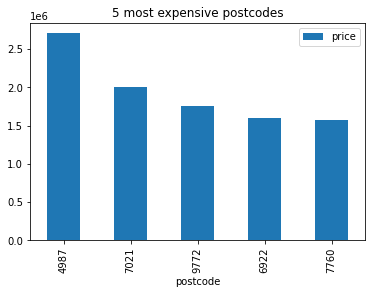

In [69]:
#the 5 most expensive properties by average prices for each postcode
df_gb_post_mean = df.groupby(by = "postcode").mean().sort_values(by='price',ascending=False)[:5]
df_gb_post_mean.plot(y= "price" , kind = 'bar')
plt.title ("5 most expensive postcodes")
plt.show()

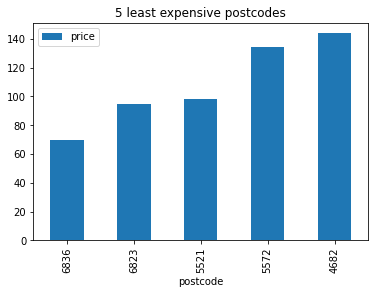

In [70]:
#the 5 least expensive properties by average prices for each postcode
df_gb_post_mean = df.groupby(by = "postcode").mean().sort_values(by='price',ascending=True)[:5]
df_gb_post_mean.plot(y= "price" , kind = 'bar')
plt.title ("5 least expensive postcodes")
plt.show()

In [72]:
# to find out the prices by provinces, we used groupby function
df_gb_province_mean = df.groupby(by = "Province").mean().sort_values(by='price',ascending=False)
df_gb_province_mean

,hyperlink,postcode,house_is,price,rooms_number,area,terrace_area,garden_area,land_surface,land_plot_surface,facades_number
Province,,,,,,,,,,,
Bruxelles,8.807605e+06,1096.735550,0.291304,665296.066113,2.978517,81.339386,14.887357,69.221426,147.792373,261.807380,0.339915
Brabant Wallon,8.810798e+06,1388.690511,0.707299,555336.188029,3.962774,98.601460,19.589992,606.005296,2141.849751,2315.668040,0.769932
Brabant Flamand,8.807950e+06,2378.132515,0.621268,464309.040168,3.115337,94.075665,11.360262,188.948676,1075.065488,1234.012788,0.892033
Fland Occidentale,8.752942e+06,8481.966064,0.410778,430606.885227,2.622040,78.793399,4.990982,81.431215,671.742984,766.178497,0.491841
Anvers,8.837422e+06,2418.045497,0.494195,382301.335629,2.856291,93.191403,8.440878,195.958871,648.733157,696.465829,0.988538
Flandre Orientale,8.808173e+06,9369.791420,0.572052,329550.821706,2.880812,90.010275,7.666851,85.923050,461.941054,598.859885,0.649886
Namur,8.815770e+06,5306.671010,0.788274,254213.936754,3.432139,75.280130,9.166667,623.454167,1049.896491,1158.075549,0.998864
Liege,8.795767e+06,4370.679129,0.737058,250195.621832,3.407149,82.611339,12.266988,244.914043,797.933828,730.367758,0.801611
Limbourg,8.824832e+06,3704.723093,0.577847,248732.236761,2.873563,94.120167,7.114504,134.884228,1072.378667,1302.143110,1.327168


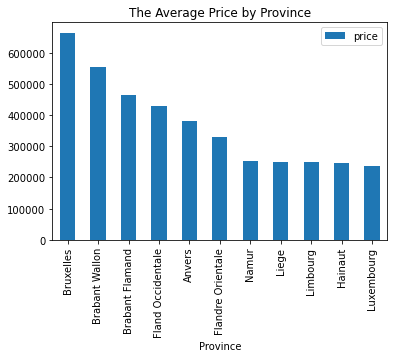

In [73]:
df_gb_province_mean.plot(y= "price" , kind = 'bar')
plt.title("The Average Price by Province")
plt.show()

In [74]:
#to see the prices according to property type we grouped the data frame by privinces and property types
df.groupby(["Province", "property_subtype"]).mean().sort_values(by='price',ascending=False)

hyperlink     postcode  house_is  \
Province        property_subtype                                        
Hainaut         CASTLE            7.768432e+06  7711.000000       1.0   
Liege           CASTLE            8.307536e+06  4885.000000       1.0   
Hainaut         OTHER_PROPERTY    8.914472e+06  7780.000000       1.0   
Brabant Flamand CASTLE            8.861274e+06  2671.333333       1.0   
Anvers          CASTLE            8.952363e+06  2800.000000       1.0   
...                                        ...          ...       ...   
                CHALET            8.916489e+06  2230.000000       1.0   
Luxembourg      BUNGALOW          8.951125e+06  6690.000000       1.0   
                FLAT_STUDIO       8.951832e+06  6650.000000       0.0   
Anvers          BUNGALOW          8.688288e+06  2490.000000       1.0   
Brabant Wallon  FLAT_STUDIO       8.712422e+06  1400.000000       0.0   

                                         price  rooms_number        area  \
Province        property_subtype                                           
Hainaut         CASTLE            3.500000e+06      8.000000   -1.000000   
Liege           CASTLE            3.000000e+06     18.500000   -1.000000   
Hainaut         OTHER_PROPERTY    2.857500e+06     48.000000  211.000000   
Brabant Flamand CASTLE            2.648333e+06     13.333333    0.666667   
Anvers          CASTLE            2.500000e+06     10.000000  667.000000   
...                                        ...           ...         ...   
                CHALET            6.500000e+04      1.666667   35.333333   
Luxembourg      BUNGALOW          6.245000e+04      2.500000   36.500000   
                FLAT_STUDIO       6.150000e+04      0.000000   11.500000   
Anvers          BUNGALOW          6.000000e+04      2.000000   95.000000   
Brabant Wallon  FLAT_STUDIO       5.500000e+04      0.000000   22.000000   

                                  terrace_area  garden_area  land_surface  \
Province        property_subtype                                            
Hainaut         CASTLE                0.000000          NaN           NaN   
Liege           CASTLE                1.500000          0.0  40000.000000   
Hainaut         OTHER_PROPERTY        0.000000          0.0    522.500000   
Brabant Flamand CASTLE               13.333333          0.0  10696.333333   
Anvers          CASTLE                0.000000      40731.0  41412.000000   
...                                        ...          ...           ...   
                CHALET                0.000000          NaN           NaN   
Luxembourg      BUNGALOW              7.500000        200.0           NaN   
                FLAT_STUDIO           0.000000          0.0      0.000000   
Anvers          BUNGALOW              0.000000          NaN           NaN   
Brabant Wallon  FLAT_STUDIO           0.000000          0.0      0.000000   

                                  land_plot_surface  facades_number  
Province        property_subtype                                     
Hainaut         CASTLE                 18000.000000             4.0  
Liege           CASTLE                 27500.000000             2.0  
Hainaut         OTHER_PROPERTY          2322.500000             0.0  
Brabant Flamand CASTLE                 10696.333333             0.0  
Anvers          CASTLE                 41412.000000             0.0  
...                                             ...             ...  
                CHALET                   966.333333             4.0  
Luxembourg      BUNGALOW                 250.000000             4.0  
                FLAT_STUDIO                0.000000             2.0  
Anvers          BUNGALOW                1250.000000             4.0  
Brabant Wallon  FLAT_STUDIO               22.000000             0.0  

[222 rows x 11 columns]

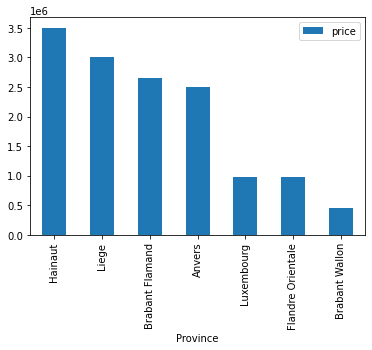

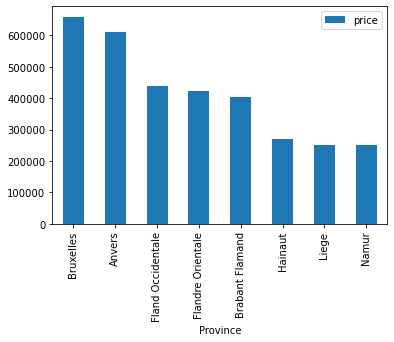

In [75]:
#dont use
df_type = df.loc[df["property_subtype"] == "CASTLE"].groupby("Province").mean().sort_values(by='price',ascending=False)
p1 = df_type.plot(y= "price" , kind = 'bar')
df_type1 = df.loc[df["property_subtype"] == "LOFT"].groupby("Province").mean().sort_values(by='price',ascending=False)
p2 = df_type1.plot(y= "price" , kind = 'bar')
plt.show()

In [76]:
property_t_list = df.groupby("property_subtype").count().index.to_list()

/Users/mselmaesen/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


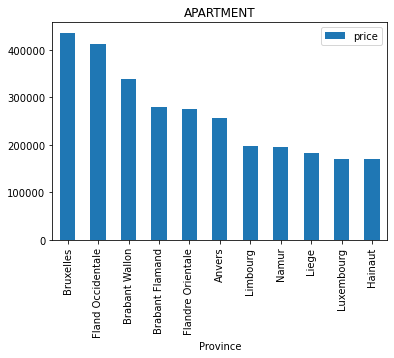

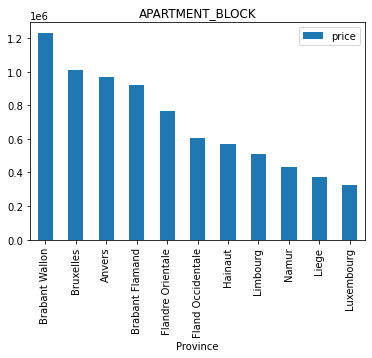

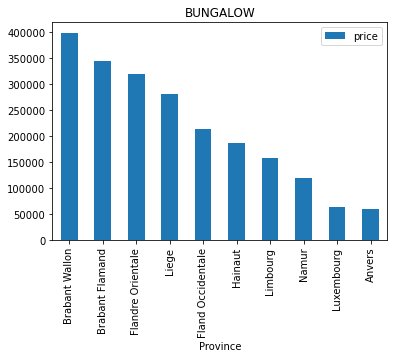

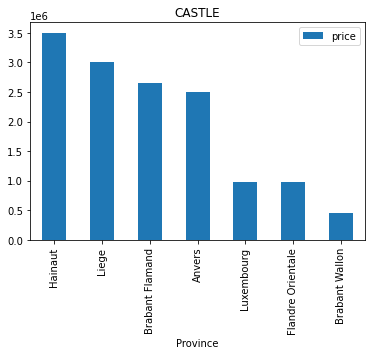

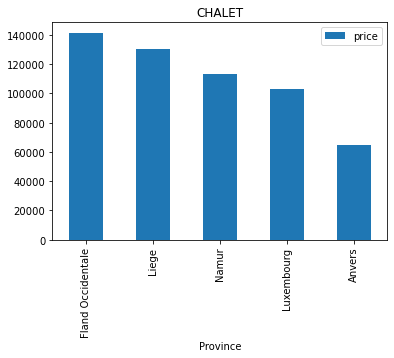

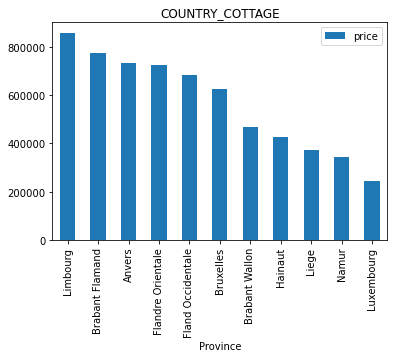

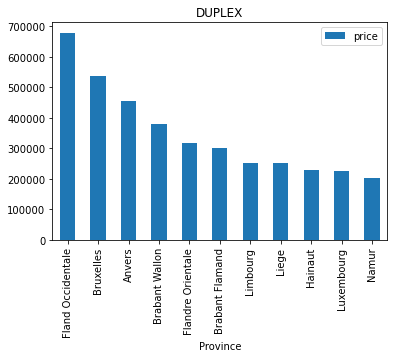

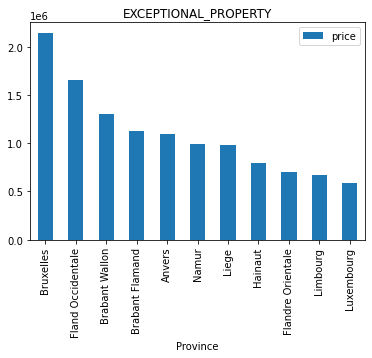

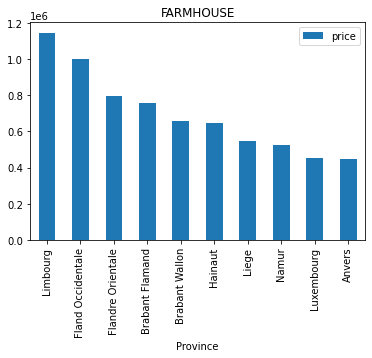

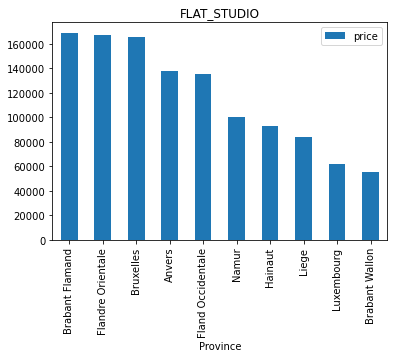

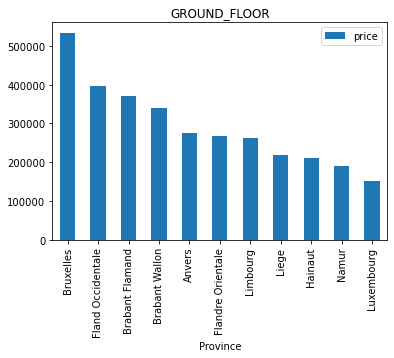

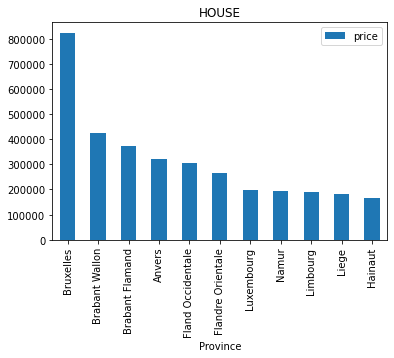

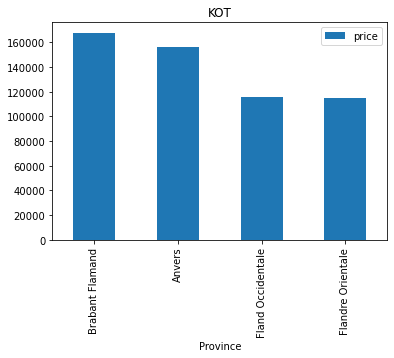

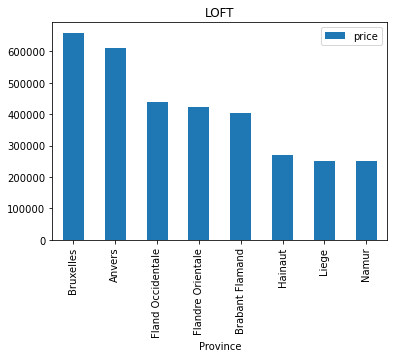

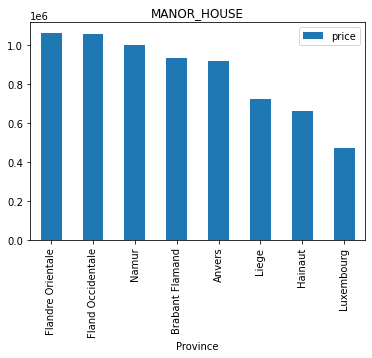

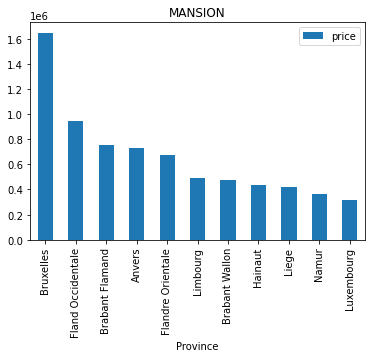

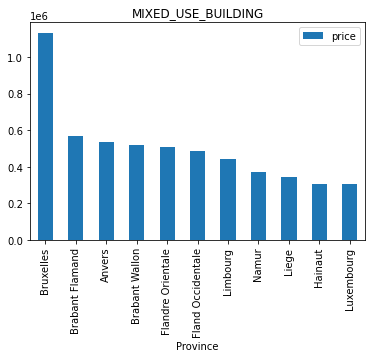

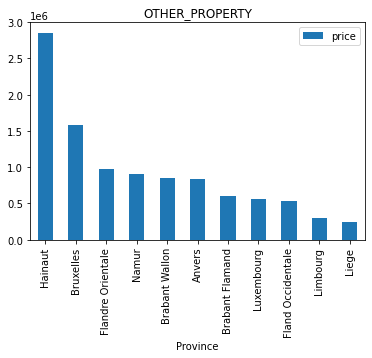

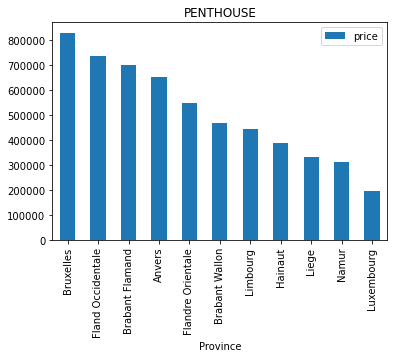

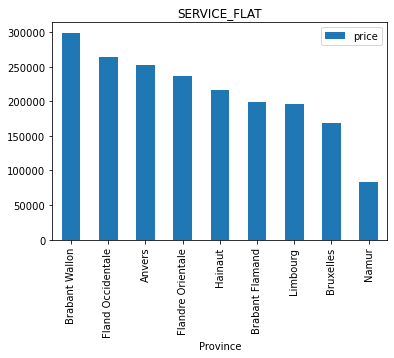

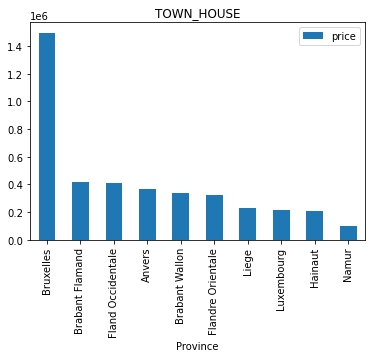

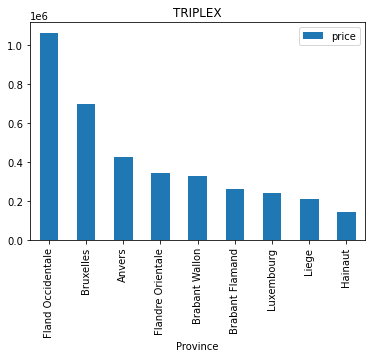

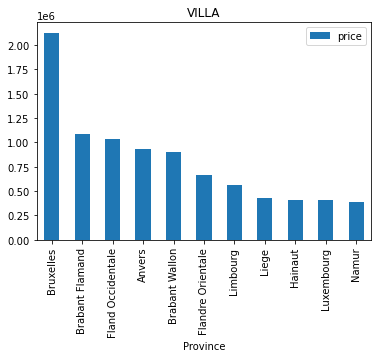

In [77]:
# this function is generating graphs according to provinces
def type_to_bar (type_prop):
    df_type = df.loc[df["property_subtype"] == type_prop].groupby("Province").mean().sort_values(by='price',ascending=False)
    df_type.plot(y= "price" , kind = 'bar')
    plt.title(type_prop)

# use the function for each property types
for n in property_t_list:
    type_to_bar(n)   

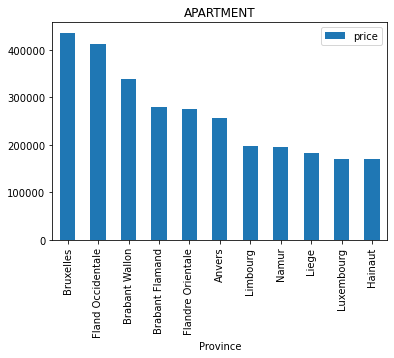

In [21]:
type_to_bar("APARTMENT")



Text(0.5, 1.0, 'The Distribution of Sellig Properties by Provinces')

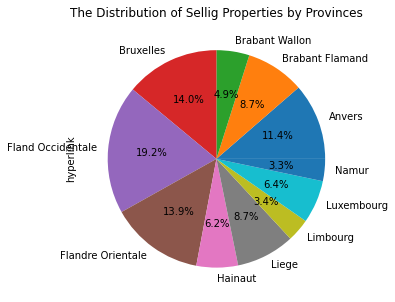

In [78]:
#This graph shows the count distribution of selling properties for each provinces.
df_province_count = df.groupby("Province").count()
plot = df_province_count.plot.pie(y = "hyperlink", figsize=(5, 5), subplots=False, autopct='%1.1f%%',
                                  legend = False, fontsize=10)
plt.title("The Distribution of Sellig Properties by Provinces")